In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
practice = pd.read_csv("titanic_train.csv")

In [10]:
practice.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#practice.drop(labels = 'zero', axis=1)

In [13]:
practice.shape

(891, 12)

In [14]:
practice.size

10692

In [15]:
#finding null values
practice.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
practice.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

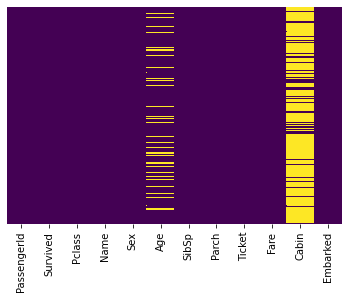

In [17]:
#visualising null values using seaborn
sns.heatmap(practice.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [19]:
#sns.heatmap(practice.isnull(), yticklabels(inde values or y axis) = True, cbar = True, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

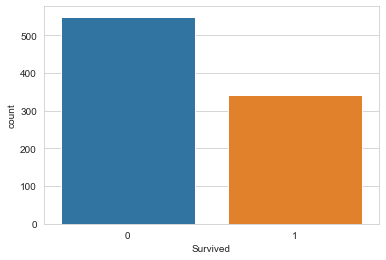

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=practice)

<AxesSubplot:xlabel='Survived', ylabel='count'>

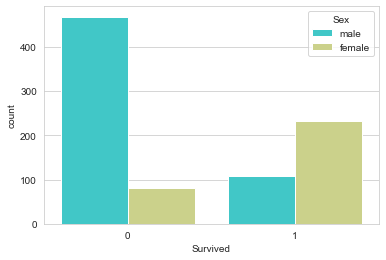

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=practice, palette='rainbow')  #palette is optional. other type is RdBu_r

<AxesSubplot:xlabel='Survived', ylabel='count'>

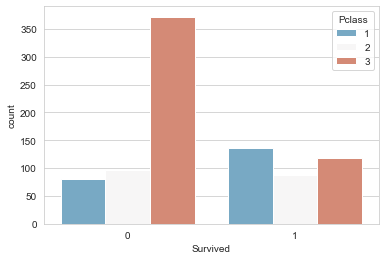

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=practice, palette='RdBu_r')

C:\Users\SantoshKumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

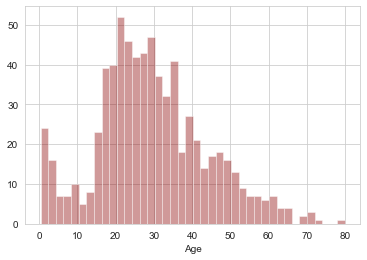

In [31]:
sns.distplot(practice['Age'].dropna(), kde=False, color='darkred',bins=40)

<AxesSubplot:>

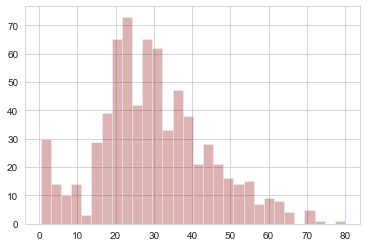

In [32]:
practice['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

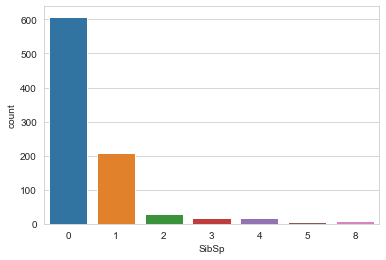

In [33]:
sns.countplot(x='SibSp',data=practice)

<AxesSubplot:>

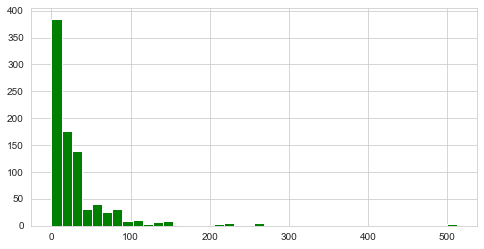

In [36]:
practice['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [37]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

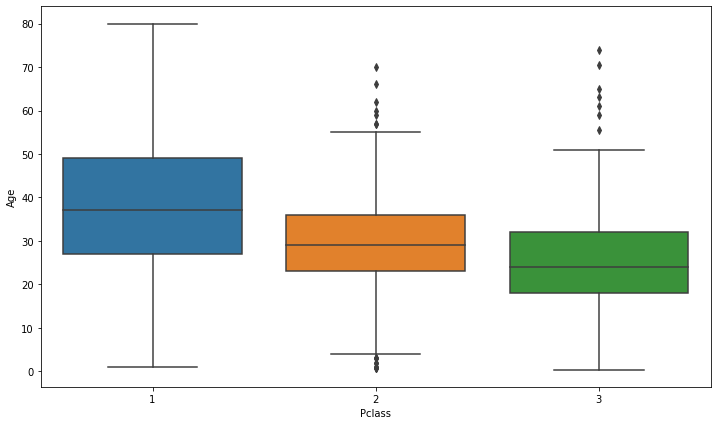

In [3]:
#DATA CLEANING

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=practice)

In [5]:
def input_age(cols):             #handling null values
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 25
    else:
        return Age

In [6]:
practice['Age'] = practice[['Age', 'Pclass']].apply(input_age, axis=1)

<AxesSubplot:>

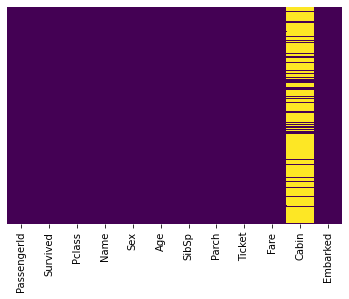

In [10]:
sns.heatmap(practice.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
sns.heatmap(practice.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [12]:
practice.drop('Cabin', axis=1, inplace=True)

In [13]:
practice.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

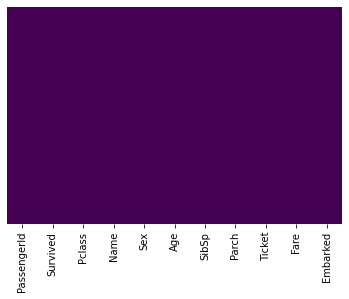

In [14]:
sns.heatmap(practice.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
#Converting Categorical Features

In [15]:
practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
pd.get_dummies(practice['Embarked'],drop_first=True).head()  #first column is dropped cuz if q and s is 0, then p=1

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
sex = pd.get_dummies(practice['Sex'],drop_first=True)
embark = pd.get_dummies(practice['Embarked'],drop_first=True)

In [20]:
practice.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
practice.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,25.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [23]:
practice = pd.concat([practice,sex,embark],axis=1)

In [24]:
practice.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
#data is ready!

In [27]:
#survived -> dependent
#Logistic Regression

In [34]:
inp = practice[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']].values
outp = practice['Survived'].values

In [33]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(inp, outp, test_size = 0.30, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

C:\Users\SantoshKumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
prediction = model.predict(xtest)

In [43]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [45]:
xtrain.shape

(623, 9)

In [49]:
xtest.shape

(268, 9)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
accu = confusion_matrix(ytest, prediction)

In [53]:
accu

array([[134,  20],
       [ 42,  72]], dtype=int64)

<AxesSubplot:>

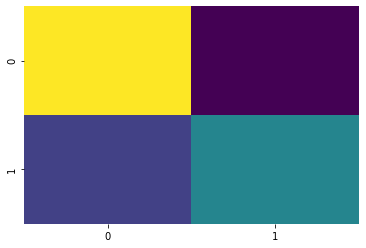

In [54]:
sns.heatmap(accu, cbar=False, cmap='viridis')

In [55]:
acc = accuracy_score(ytest, prediction)
acc

0.7686567164179104

In [58]:
print('misclassified values : ', (ytest != prediction).sum())

misclassified values :  62
